# Занятие 1. Срздание графа друзей через VK Api + Yandex Geocoder + DataLens

Ссылка на DataLens: https://datalens.yandex/v1ezna6n6l3ck

## Задание 1. Вывод информации о себе

In [1]:
%pip install vk
%pip install requests
%pip install vk_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 774.0 kB/s eta 0:00:00


In [2]:
import requests
import vk, vk_api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Для получения токена создаем приложение, отправяем запрос по ссылке ниже.

https://id.vk.com/authorize?client_id=51750477&response_type=code&redirect_uri=https://oauth.vk.com/blank.htmll&scope=all

In [8]:
params = {
    "client_id": 51750477,
    "response_type": "code",
    "redirect_uri": "https://oauth.vk.com/blank.html",
    "scope": "all"

}
response = requests.get('https://oauth.vk.com/authorize', params=params)
response.url

'https://oauth.vk.com/authorize?client_id=51750477&response_type=code&redirect_uri=https%3A%2F%2Foauth.vk.com%2Fblank.html&scope=all'

https://oauth.vk.com/access_token?client_id=51750477&client_secret=3Myvis9Uclw2fii4tlgy&redirect_uri=https://oauth.vk.com/blank.html&code=4e573966def60a6bfc

Получаем access token.

In [7]:
access_token_json = {"access_token":"vk1.a.8mjH-wb337L_XtwRTmKo2a3biIBXSFxAw743sHMu2ZcvohtqhyuyB1_znTtUgDnglJsnPLgBnTCvOc3ACn1rxpUpE5WvKYXum-vTXNJAboFnNpr7Wn8Pl-Iiyif3uzVRPP_sMWZtJhtwVIZeT94LXR6TAkUg9gkfoqpQffqwt0jZMor3BdqO9zRWTlZpLUUp",
                     "expires_in":86358,
                     "user_id":259909233}

In [8]:
access_token = access_token_json["access_token"]
access_code = "4e573966def60a6bfc"
my_user_id = 259909233

In [9]:
vk_session = vk_api.VkApi(token=access_token)
vk = vk_session.get_api()

In [10]:
my_info = vk.users.get(user_id=my_user_id, fields=['bdate', 'counters'])
my_info

[{'id': 259909233,
  'bdate': '11.10.2002',
  'counters': {'albums': 1,
   'audios': 720,
   'followers': 90,
   'friends': 201,
   'gifts': 192,
   'groups': 258,
   'online_friends': 19,
   'pages': 146,
   'photos': 2,
   'subscriptions': 1,
   'user_photos': 0,
   'videos': 0,
   'video_playlists': 1,
   'new_photo_tags': 0,
   'new_recognition_tags': 0,
   'clips_followers': 291},
  'first_name': 'Лиза',
  'last_name': 'Пластинина',
  'can_access_closed': True,
  'is_closed': False}]

In [9]:
my_data = pd.DataFrame(data=my_info)
my_data

,id,bdate,counters,first_name,last_name,can_access_closed,is_closed
0,259909233,11.10.2002,"{'albums': 1, 'audios': 720, 'followers': 92, ...",Лиза,Пластинина,True,False


## Задание 2. Построение графа моих друзей

In [12]:
users = []
for user_id in range(1, 11):
  user = vk.users.get(user_id=user_id, fiels='id,first_name,last_name,country,city,counters')[0]
  if 'deactivated' not in user:
    users.append(user)

In [13]:
users_data = pd.DataFrame(data=users)
users_data

,id,first_name,last_name,can_access_closed,is_closed
0,1,Павел,Дуров,True,False
1,2,Александра,Владимирова,False,True
2,5,Илья,Перекопский,True,False
3,6,Николай,Дуров,True,False
4,7,Алексей,Кобылянский,False,True
5,8,Аки,Сепиашвили,True,False
6,9,Настя,Васильева,False,True
7,10,Александр,Кузнецов,False,True


In [14]:
def get_friends(user_id, with_name=False, with_cities=False):
  fields = 'first_name,last_name' if with_name else ''
  fields += 'city,country' if with_cities else ''
  try:
    friends_list = vk.friends.get(user_id=user_id, fields=fields, order='hints')
    return friends_list['items']
  except:
    return []

In [15]:
central_users = get_friends(my_user_id, with_name=True)
central_users = {user_dict['id']: user_dict.get('first_name') + ' ' + user_dict.get('last_name') for user_dict in central_users}

central_users[my_user_id] = 'Я'

In [16]:
friends_area_raw = get_friends(my_user_id, with_cities=True)
friends_area = []
for friend in friends_area_raw:
  friends_area.append({'id': friend['id'], 'city': friend.get('city')['title'] if 'city' in friend else None, 'country': friend.get('country')['title'] if 'country' in friend else None})
friends_data = pd.DataFrame(data=friends_area)
friends_data.head()

,id,city,country
0,268082629,Москва,Россия
1,162937367,Москва,Россия
2,334965594,None,None
3,403335348,None,None
4,242366621,Москва,Россия


In [19]:
friends_data['city'].value_counts()

Москва             95
Санкт-Петербург     3
Мытищи              2
Самара              2
Омск                2
Долгопрудный        2
Нижний Новгород     2
Саранск             1
Нетания             1
Клин                1
Медынь              1
Hong Kong           1
Ростов-на-Дону      1
Praha               1
Arequipa            1
Челябинск           1
Казань              1
Королёв             1
Электросталь        1
Саратов             1
Владивосток         1
Химки               1
Дмитров             1
Астрахань           1
Тверь               1
Тула                1
Михайловка          1
Name: city, dtype: int64

In [16]:
friends_data.to_csv('friends_area.csv')

## Польгуемся Геокоредом для добавления геоточек

In [20]:
api_key = "82e1b954-274d-482a-8c88-94549d4abc66"

In [21]:
import requests
from dataclasses import dataclass

In [22]:
from tables.utils import lazyattr
@dataclass
class YandexGeocoder:
  api_key: str
  geocoder_url: str = 'https://geocode-maps.yandex.ru/1.x'

  def adress_to_geopoint(self, address: str) -> str:
    response = requests.get(self.geocoder_url, params={
        'apikey': self.api_key,
        'geocode': address,
        'format': 'json'
    })
    response.raise_for_status()
    result = response.json()['response']['GeoObjectCollection']['featureMember']
    if not result:
      return None

    lat, lon = result[0]['GeoObject']['Point']['pos'].split()
    return self._to_datalens_format(lon, lat)

  def _to_datalens_format(self, lon, lat):
    return f'[{lon}, {lat}]'

In [23]:
geocoder = YandexGeocoder(api_key=api_key)

In [83]:
s = geocoder.adress_to_geopoint('Россия, Москва')
print('s', s)

s [55.755864, 37.617698]


In [27]:
encoded_data = []
for friend in friends_area:
  if friend['city'] is not None:
    country = friend['country'] if friend['country'] is not None else 'Россия'
    address = country + ', ' + friend['city']
    s = geocoder.adress_to_geopoint(address)
    # friends_area.append(s)
    # print(type(s))
    encoded_data.append([s, friend['country'], friend['city']])
encoded_data[:10]

[['[55.755864, 37.617698]', 'Россия', 'Москва'],
 ['[55.755864, 37.617698]', 'Россия', 'Москва'],
 ['[55.755864, 37.617698]', 'Россия', 'Москва'],
 ['[55.755864, 37.617698]', 'Россия', 'Москва'],
 ['[55.755864, 37.617698]', 'Россия', 'Москва'],
 ['[55.933302, 37.51423]', 'Россия', 'Долгопрудный'],
 ['[55.755864, 37.617698]', 'Россия', 'Москва'],
 ['[55.755864, 37.617698]', 'Россия', 'Москва'],
 ['[55.755864, 37.617698]', 'Россия', 'Москва'],
 ['[55.755864, 37.617698]', 'Россия', 'Москва']]

In [28]:
encoded_df = pd.DataFrame(data=encoded_data, columns=['coords', 'country', 'city'])
encoded_df

,coords,country,city
0,"[55.755864, 37.617698]",Россия,Москва
1,"[55.755864, 37.617698]",Россия,Москва
2,"[55.755864, 37.617698]",Россия,Москва
3,"[55.755864, 37.617698]",Россия,Москва
4,"[55.755864, 37.617698]",Россия,Москва
...,...,...,...
123,"[55.755864, 37.617698]",Россия,Москва
124,"[55.755864, 37.617698]",Россия,Москва
125,"[50.07938, 43.23445]",Россия,Михайловка
126,"[53.195878, 50.100202]",Россия,Самара


In [29]:
encoded_df.to_csv('coords.csv')

Создаем граф

In [17]:
import time
from random import randint

graph = {}

for user_id in central_users.keys():
  graph[user_id] = get_friends(user_id)
  time.sleep(randint(1, 11) / 100)

In [18]:
unique_keys = set(graph.keys())

In [19]:
gr = nx.Graph()
for user_id, user_friends in graph.items():
  gr.add_node(central_users[user_id])
  for friend_id in user_friends:
    if friend_id in central_users:
      gr.add_edge(central_users[user_id], central_users[friend_id])

In [20]:
def graph_plot():
  plt.figure(figsize=(12,9))
  nx.draw_kamada_kawai(gr, with_labels=True, node_size=50, width=0.5)
  plt.show()

In [21]:
gr.remove_node(central_users[my_user_id])

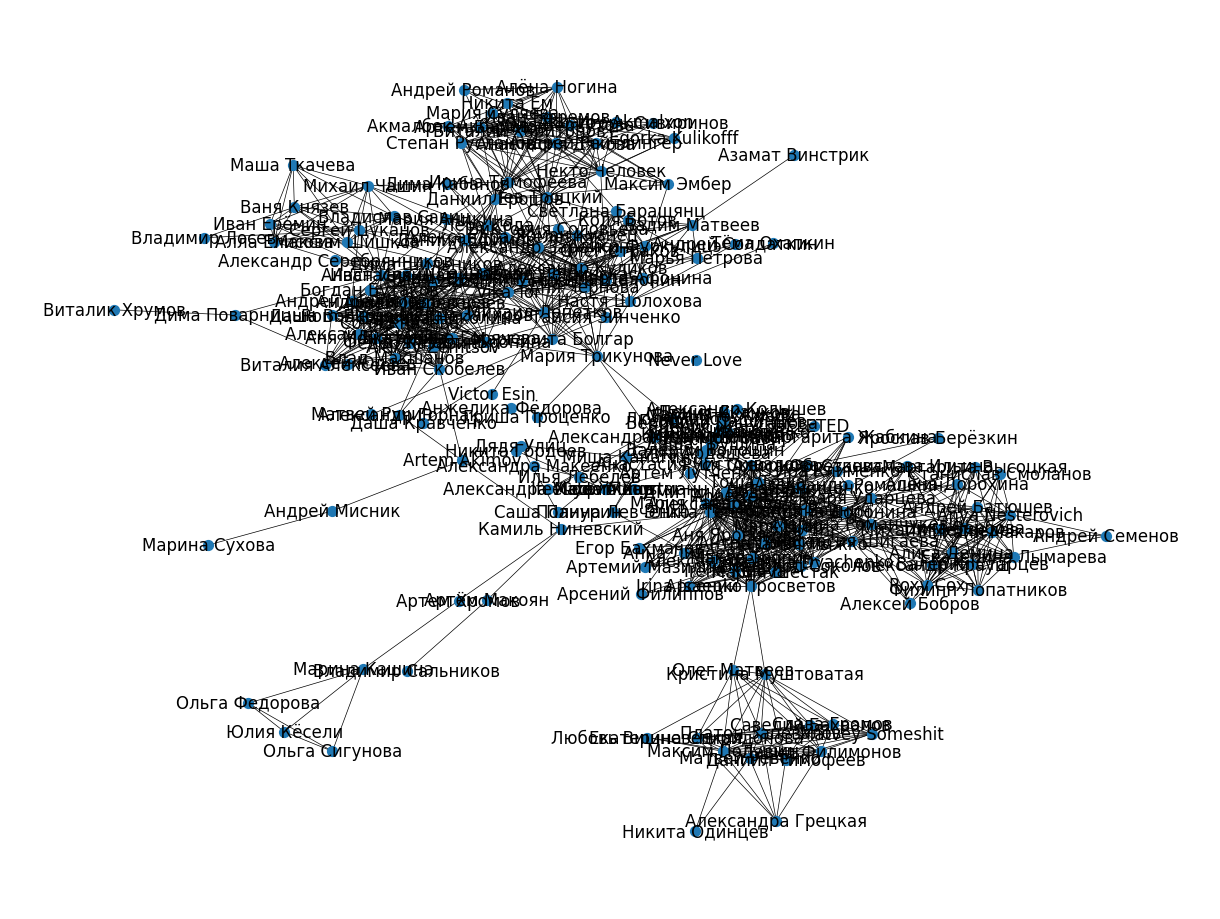

In [22]:
graph_plot()

На графе могу выделить несколько  кластеров: друзья из университета, знакомые из лагеря, в который я ездила много раз подряд, а также знакомые из музыкальной группы.

In [23]:
def graph_save(name):
  plt.figure(figsize=(12,9))
  nx.draw_kamada_kawai(gr, with_labels=True, node_size=50, width=0.5)
  plt.savefig(name)

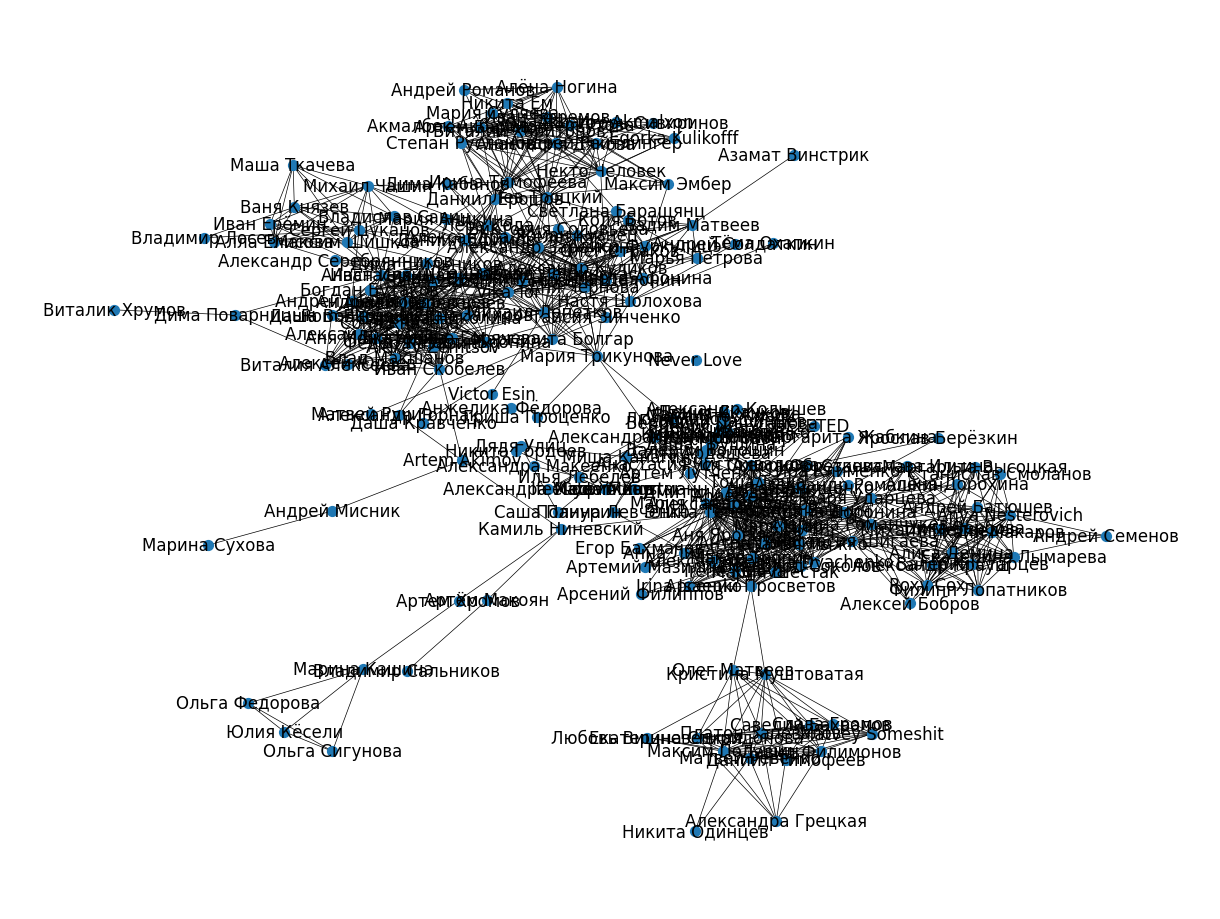

In [24]:
graph_save('my_friends.png')

# Задание 3

In [14]:
city_id = vk.database.getCities(q='Владивосток')['items'][0]['id']
city_id

37

In [141]:
rnd_users = vk.users.search(hometown='Владивосток', age_from=0, age_to=21, count=500)
print(len(rnd_users['items']))
rnd_users['count']

458


458

In [103]:
len(rnd_users['items'])
# rnd_users['items']

970

Доставать пользователей было тяжело, я старалась, чтобы распределение было максимально случайным, но все равно не уверена, что оно рандомное, так как в каких-то возрастных диапазонах людей просто было сильно меньше, чем в других.

In [87]:
vladivostok_users = []
for age in range(0, 100, 5):
  rnd_users = vk.users.search(hometown='Владивосток', age_from=age, age_to=age+4, count=1000, sex=1, fields='sex,bdate')
  if len(rnd_users['items']) != 0:
    for i in range(0, min(400, len(rnd_users['items']))):
      vladivostok_users.append(rnd_users['items'][i])

In [88]:
for age in range(0, 100, 5):
  rnd_users = vk.users.search(hometown='Владивосток', age_from=age, age_to=age+4, count=1000, sex=2, fields='sex,bdate')
  if len(rnd_users['items']) != 0:
    for i in range(0, min(400, len(rnd_users['items']))):
      vladivostok_users.append(rnd_users['items'][i])

Тут я подумала, что может для распределения будет лучше просто вытаскивать людей по месяцам их рождения...

In [79]:
# vladivostok_users = []
# for month in range(1, 13):
#   rnd_users = vk.users.search(hometown='Владивосток', birth_month=month, count=600, sex=1, fields='sex,bdate')['items']
#   if len(rnd_users) != 0:
#     for user in rnd_users:
#       vladivostok_users.append(user)

In [80]:
# for month in range(1, 13):
#   rnd_users = vk.users.search(hometown='Владивосток', birth_month=month, count=600, sex=2, fields='sex,bdate')['items']
#   if len(rnd_users) != 0:
#     for user in rnd_users:
#       vladivostok_users.append(user)

In [89]:
print(len(vladivostok_users))
vladivostok_users[0]

10646


{'id': 798079978,
 'bdate': '18.6.2009',
 'track_code': 'c5bdcbf5ZLzwA4P8NERBVB73ya32guEXQ4ge2YtBS6P_jUg1feYD1eZQj80xGE9cKA5aGVmHiRlFix7ZhSc5yg',
 'sex': 1,
 'first_name': 'Камилла',
 'last_name': 'Абачян',
 'can_access_closed': False,
 'is_closed': True}

### Проверим наличие повторений пользователей (все оказались уникальными)

In [90]:
id_checker = set()
for user in vladivostok_users:
  if user['id'] in id_checker:
    raise IndexError(f'{user} is already in set')
  id_checker.add(user['id'])
print('All ids are unique')

All ids are unique


Рандомно перемешаем массив

In [106]:
from random import shuffle
shuffle(vladivostok_users)

vladivostok_data = []
for user in vladivostok_users:
  if 'bdate' in user and len(user['bdate'].split('.')) == 3:
    vladivostok_data.append({'birth_year': user['bdate'].split('.')[2], 'first_name': user['first_name'], 'sex': user['sex']})

vladivostok_data = vladivostok_data[:10000]
len(vladivostok_data)

10000

In [107]:
df = pd.DataFrame(data=vladivostok_data)
df.to_csv('Vladivostok_users.csv')
df

,birth_year,first_name,sex
0,1968,Дина,1
1,2004,Ульяна,1
2,2001,Александр,2
3,1989,Мария,1
4,2005,Эмилия,1
...,...,...,...
9995,1983,Тимофей,2
9996,1968,Вадим,2
9997,1980,Инна,1
9998,1967,Елена,1


Рейтинг популярности женских имен:

In [116]:
df[df['sex'] == 1]['first_name'].value_counts()

Елена      268
Татьяна    241
Наталья    235
Ольга      199
Ирина      192
          ... 
Marta        1
Бобик        1
Окса         1
Natalie      1
Энтони       1
Name: first_name, Length: 728, dtype: int64

Рейтинг популярности мужских имен:

In [118]:
df[df['sex'] == 2]['first_name'].value_counts()

Александр        401
Сергей           302
Андрей           220
Алексей          205
Владимир         205
                ... 
Веселая-Затея      1
Автандил           1
हर                 1
Slava              1
Прудик             1
Name: first_name, Length: 771, dtype: int64

## Доп. работа

Можно достать id любого человека через его uri

In [36]:
vanya_id = vk.users.get(user_id='justapersonn')[0]['id']
vanya_id

256563303